# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the Haskell Indian Nations University campus in Lawrence, KS. The address in here,
`'Haskell Indian Nations University, Lawrence, KS, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'university'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [ ]:
# Search for Haskell Indian Nations University
haskell_gdf = osm.features_from_address(
    'Haskell Indian Nations University, Lawrence, KS, United States',
    {'amenity': ['university']})
haskell_gdf

,,ways,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,boundary,ele,gnis:feature_id,heritage,...,nrhp:criteria,nrhp:inscription_date,nrhp:nhl,protection_title,ref:nrhp,type,wikidata,wikipedia,nodes,geometry
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,2330930,"[172603550, 174576051, 174576058, 171002778, 1...",Lawrence,2300,66046,Barker Avenue,university,protected_area,268,479134,2,...,(A),"July 4, 1961",yes,protected_site,66000342,multipolygon,Q845332,en:Haskell Indian Nations University,"[[[391518501, 1834666320, 1834666332, 12070968...","POLYGON ((-95.23831 38.93552, -95.23817 38.935..."


<Axes: >

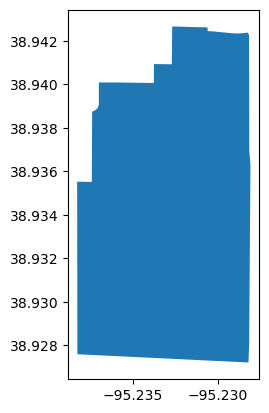

In [3]:
haskell_gdf.plot()

We have a map of the Haskell Campus!

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [4]:
# Plot haskell boundary
haskell_map = haskell_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Haskell Indian Nations Universty, Lawrence, KS",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(haskell_map, 'haskell.html')

# Display the map
haskell_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [9]:
# Search for MSU Denver
msu_gdf = osm.features_from_address(
    'Metropolitan State University of Denver, Denver, CO, United States',
    {'amenity': ['university']})
msu_gdf

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                             
node         2155391509     Denver              890         80204         CO   
             4131746182     Denver             1200         80217         CO   
             5336796189     Denver             1201         80202         CO   
             12187139864    Denver              800         80204         CO   
             12187139865    Denver             1201         80204         CO   
             12652743147       NaN              NaN           NaN        NaN   
             12652743148       NaN              NaN           NaN        NaN   
way          50807585       Denver             1201         80204         CO   

                               addr:street        alt_name     amenity  \
element_type osmid                                                       
node         2155391509    Auraria Parkway      MSU Denver  university   
             4131746182     Larimer Street             NaN  university   
             5336796189   16th Street Mall             NaN  university   
             12187139864     Curtis Street             NaN  university   
             12187139865    Larimer Street             NaN  university   
             12652743147               NaN             NaN  university   
             12652743148               NaN             NaN  university   
way          50807585           5th Street  Auraria Campus  university   

                         designation  \
element_type osmid                     
node         2155391509   University   
             4131746182          NaN   
             5336796189          NaN   
             12187139864         NaN   
             12187139865         NaN   
             12652743147         NaN   
             12652743148         NaN   
way          50807585            NaN   

                                                                       name  \
element_type osmid                                                            
node         2155391509             Metropolitan State University of Denver   
             4131746182   CU Denver Facility For Advanced Spatial Techno...   
             5336796189                           University of the Rockies   
             12187139864                        Community College of Denver   
             12187139865                      University of Colorado Denver   
             12652743147             Auraria Campus Administration Building   
             12652743148         Boulder Creek, Community College of Denver   
way          50807585                       Auraria Higher Education Center   

                                                      old_name  ... addr:unit  \
element_type osmid                                              ...             
node         2155391509   Metropolitan State College of Denver  ...       NaN   
             4131746182                                    NaN  ...     5032C   
             5336796189                                    NaN  ...       200   
             12187139864                                   NaN  ...       NaN   
             12187139865                                   NaN  ...       NaN   
             12652743147                                   NaN  ...       NaN   
             12652743148                                   NaN  ...       NaN   
way          50807585                                      NaN  ...       NaN   

                         level wheelchair operator:type  \
element_type osmid                                        
node         2155391509    NaN        NaN           NaN   
             4131746182      4    limited           NaN   
             5336796189    NaN        NaN           NaN   
             12187139864   NaN        NaN        public   
             12187139865   NaN        NaN           NaN   
             12652743147   NaN        NaN           NaN   
        

In [17]:
type(msu_gdf)

geopandas.geodataframe.GeoDataFrame

In [20]:
#Selecting MSU Denver Campus that has nodes
#new variable = gdf selecting from [gdf.column name == "name"] 
auraria=msu_gdf[msu_gdf.alt_name=="Auraria Campus"]
auraria

,,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,alt_name,amenity,designation,name,old_name,...,addr:unit,level,wheelchair,operator:type,nodes,ele,gnis:feature_id,internet_access,internet_access:fee,name:en
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
way,50807585,Denver,1201,80204,CO,5th Street,Auraria Campus,university,NaN,Auraria Higher Education Center,NaN,...,NaN,NaN,limited,NaN,"[647873186, 12141206105, 3273383408, 501534305...",1584,2088849,yes,no,Auraria Higher Education Center


<Axes: >

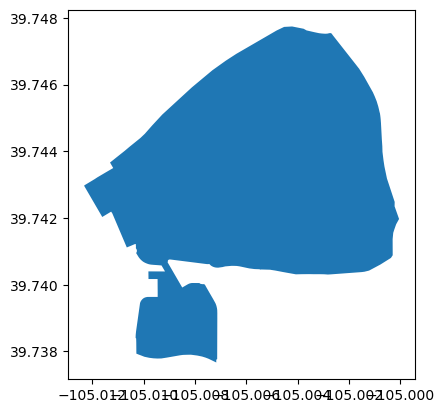

In [21]:
auraria.plot()

In [27]:
# Plot MSU Denver boundary
auraria_map = auraria.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Metropolitan State Universty of Denver, Denver, CO",
    # Add a basemap
    geo=True, tiles='CartoLight',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='crimson', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(auraria_map, 'araria.html')

# Display the map
auraria_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]